<a href="https://colab.research.google.com/github/SrinathBegudem/PyTorch_Deep_Learning_Projects/blob/main/Wine_Quality_MiniBatch_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment: Impact of Batch Size on Training and Testing Performance**

## **Introduction:**

In this experiment, we aim to explore the effect of varying batch sizes on the performance of a neural network model trained on the Wine Quality dataset. Specifically, we will analyze how changing the batch size from 2 to 512 influences the training time, training accuracy, and testing accuracy.

Batch size is a crucial hyperparameter in training deep learning models, as it affects how frequently the model updates its weights and how efficiently it processes data. Smaller batch sizes often lead to more frequent weight updates but can be computationally slower, while larger batch sizes can speed up training but may reduce the frequency of updates, impacting the model’s ability to generalize.

The goal of this experiment is to observe these dynamics by systematically varying the batch size and recording the corresponding training and testing results. We will use PyTorch as the deep learning framework to implement and run the models, allowing us to gather insights into the optimal batch size for this specific task.

Through this analysis, we hope to draw conclusions about the trade-offs involved in selecting different batch sizes and how they impact both the efficiency and effectiveness of neural network training.


In [15]:
### Import Libraries

# Import PyTorch libraries for deep learning modeling
import torch
import torch.nn as nn                   # For defining neural network layers
import torch.nn.functional as F         # Provides functions like activation functions
from torch.utils.data import DataLoader, TensorDataset  # For managing and batching datasets
from sklearn.model_selection import train_test_split    # For splitting data into train and test sets

# Import numerical libraries for calculations
import numpy as np                      # For numerical operations, arrays, and matrices
import scipy.stats as stats             # For statistical functions and probability distributions

# Import library for data management
import pandas as pd                     # For data manipulation using DataFrame structures

# Import time library for measuring computation time
import time                             # Used to track how long code execution takes

# Import visualization libraries
import matplotlib.pyplot as plt         # For creating plots and visualizing data
import matplotlib_inline.backend_inline # For configuring plot display in Jupyter Notebooks
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')  # Sets plot format to SVG for better quality visuals


# Import the data

In [16]:
url =  'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

In [17]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
df.describe() #To understand the statistics of the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

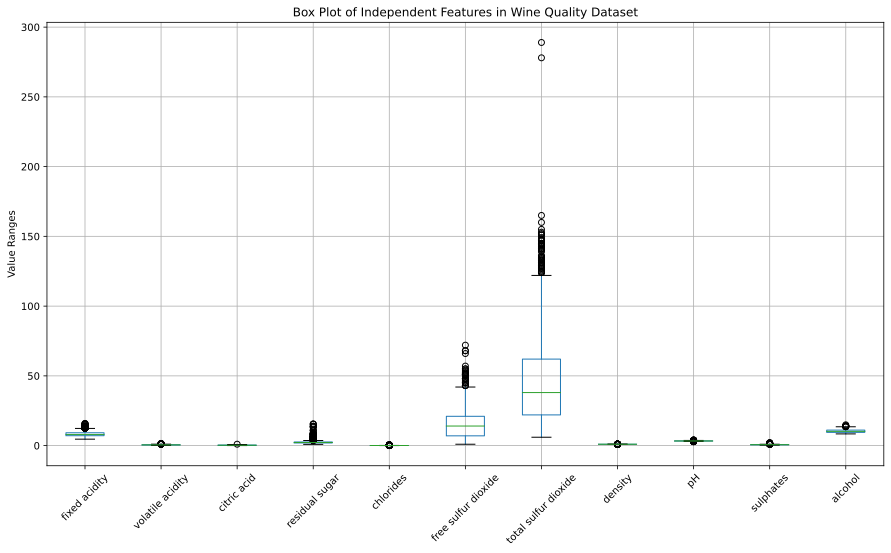

In [20]:
# Box plot to visualize the distribution of each independent feature
plt.figure(figsize=(15, 8))  # Set the figure size to make the plots readable
df.boxplot(column=list(df.columns[:-1]))  # Exclude the last column 'quality' which is the dependent variable
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Box Plot of Independent Features in Wine Quality Dataset')  # Add a title
plt.ylabel('Value Ranges')  # Label the y-axis
plt.show()  # Display the plot


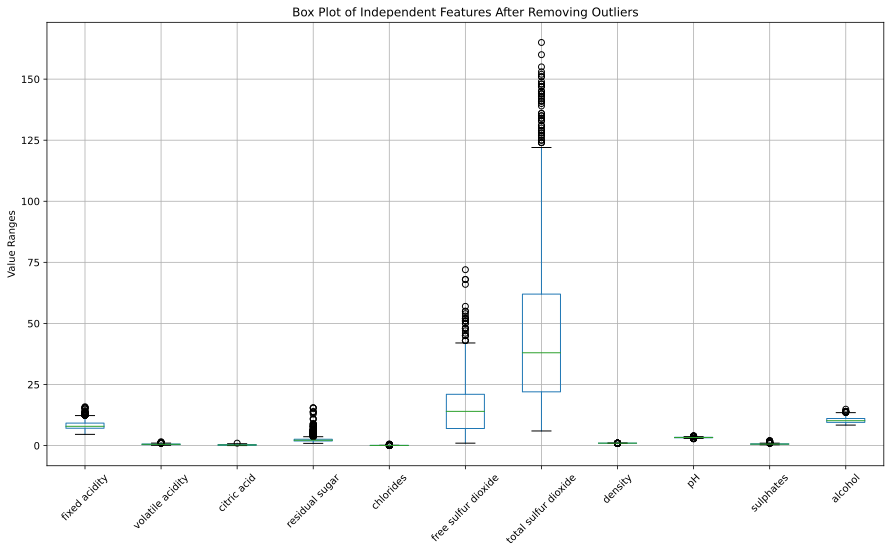

In [21]:
# Remove outliers in the 'total sulfur dioxide' column based on the box plot
df = df[df['total sulfur dioxide'] < 200]  # Keep only rows where 'total sulfur dioxide' is less than 200

# Display the updated box plot to confirm outlier removal
plt.figure(figsize=(15, 8))
df.boxplot(column=list(df.columns[:-1]))
plt.xticks(rotation=45)
plt.title('Box Plot of Independent Features After Removing Outliers')
plt.ylabel('Value Ranges')
plt.show()


In [22]:
# Normalization to ensure the data quality during deep learning modeling
# Z-score normalization is used to scale features so they have a mean of 0 and standard deviation of 1

# Select the independent columns (all columns except the last 'quality' column)
Normalized_columns = df.keys()[:-1]

# Apply z-score normalization to each of the independent columns
df[Normalized_columns] = df[Normalized_columns].apply(stats.zscore)

# Display the first few rows of the normalized DataFrame
df.head()


<ipython-input-22-5fb7306ecd7f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[Normalized_columns] = df[Normalized_columns].apply(stats.zscore)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5


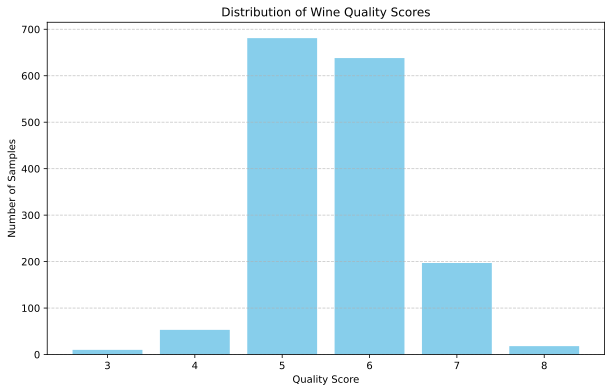

quality
3     10
4     53
5    681
6    638
7    197
8     18
Name: count, dtype: int64


In [23]:
# Check the distribution of the dependent variable 'quality'
quality_counts = df['quality'].value_counts().sort_index()  # Count the occurrences of each quality score

# Plot the distribution to visualize the balance of the data
plt.figure(figsize=(10, 6))
plt.bar(quality_counts.index, quality_counts.values, color='skyblue')
plt.xlabel('Quality Score')               # Label the x-axis as 'Quality Score'
plt.ylabel('Number of Samples')           # Label the y-axis as 'Number of Samples'
plt.title('Distribution of Wine Quality Scores')  # Set the title of the plot
plt.xticks(quality_counts.index)          # Set x-ticks to match the quality scores
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

# Print the counts to verify the data balance numerically
print(quality_counts)



<ipython-input-24-5f482905af40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['boolQuality'] = 0


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528350          0.960657    -1.391823       -0.452579  -0.244648   
1      -0.298673          1.966614    -1.391823        0.049020   0.222827   
2      -0.298673          1.295976    -1.185980       -0.165951   0.095334   
3       1.653579         -1.386577     1.489975       -0.452579  -0.265897   
4      -0.528350          0.960657    -1.391823       -0.452579  -0.244648   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.464558             -0.382535  0.556807  1.288470  -0.580216   
1             0.877032              0.654661  0.025923 -0.723652   0.127837   
2            -0.081247              0.246069  0.132100 -0.334209  -0.049176   
3             0.110409              0.434650  0.662984 -0.983280  -0.462207   
4            -0.464558             -0.382535  0.556807  1.288470  -0.580216   

    alcohol  quality  boolQuality  
0 -0.959307        5

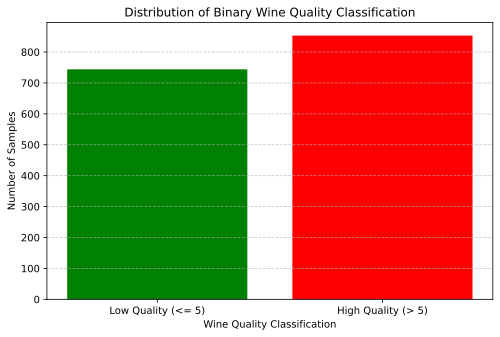

boolQuality
1    853
0    744
Name: count, dtype: int64


In [24]:
  # Create a new binary column 'boolQuality' based on the 'quality' column
# 0: Low quality (quality <= 5), 1: High quality (quality > 5)

# Initialize the new column 'boolQuality' with 0
df['boolQuality'] = 0

# Set 'boolQuality' to 1 where the 'quality' is greater than 5
df.loc[df['quality'] > 5, 'boolQuality'] = 1
# df['boolQuality'][df['quality']>5] = 1

# Display the first few rows to confirm the changes
print(df.head())

# Check the distribution of the new binary column to ensure it's correctly binarized
bool_quality_counts = df['boolQuality'].value_counts()

# Plot the distribution of the binary 'boolQuality' column
plt.figure(figsize=(8, 5))
plt.bar(bool_quality_counts.index, bool_quality_counts.values, color=['red', 'green'])
plt.xticks([0, 1], labels=['Low Quality (<= 5)', 'High Quality (> 5)'])
plt.xlabel('Wine Quality Classification')
plt.ylabel('Number of Samples')
plt.title('Distribution of Binary Wine Quality Classification')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the counts to see the balance of the new binary classification
print(bool_quality_counts)


# Converting the pd Data into tensor and performing Train/Test spilt, dataloader

In [25]:
# Convert the normalized features DataFrame to a PyTorch tensor
df_tensor = torch.tensor(df[Normalized_columns].values).float()  # Converts the normalized independent variables to a float tensor

# Convert the 'boolQuality' column (binary target) to a PyTorch tensor
target_tensor = torch.tensor(df['boolQuality'].values).float()  # Converts the target column to a float tensor

# Reshape the target tensor to be 2D (num_samples, 1)
target_tensor = target_tensor[:, None]  # Adds a dimension to make it a 2D tensor suitable for training
# Display the shapes of the tensors to confirm correct formatting
print(f"Feature Tensor Shape: {df_tensor.shape}")
print(f"Target Tensor Shape: {target_tensor.shape}")


Feature Tensor Shape: torch.Size([1597, 11])
Target Tensor Shape: torch.Size([1597, 1])


In [26]:
# Split the data into training and testing sets
# 90% of the data will be used for training, and 10% will be used for testing
train_data, test_data, train_labels, test_labels = train_test_split(
    df_tensor,
    target_tensor,
    test_size=0.1
)

# Convert the training data and labels into a PyTorch dataset
train_data_dataset = TensorDataset(train_data, train_labels)

# Convert the testing data and labels into a PyTorch dataset
test_data_dataset = TensorDataset(test_data, test_labels)

# Display the size of the training and testing datasets to confirm
print(f"Training Dataset Size: {len(train_data_dataset)} samples")
print(f"Testing Dataset Size: {len(test_data_dataset)} samples")


Training Dataset Size: 1437 samples
Testing Dataset Size: 160 samples


# Model Architecture

In [27]:
# Define the neural network model class
class ANNwine(nn.Module): # Inheriting from nn.Module, the base class for all neural network modules in PyTorch
    # Initialize the model architecture
    def __init__(self):
        # Call the initializer of the parent class nn.Module
        super().__init__()
        # The line above ensures that all the internal mechanics and setup of nn.Module are initialized correctly
        # This includes setting up the tracking of model parameters, layers, and other critical functionality

        # Define the input layer: 11 input features (normalized features from the dataset) to 16 neurons
        self.input = nn.Linear(11, 16)

        # Define hidden layers
        self.hidden1 = nn.Linear(16, 32)  # First hidden layer: 16 neurons to 32 neurons
        self.hidden2 = nn.Linear(32, 32)  # Second hidden layer: 32 neurons to 32 neurons

        # Define the output layer: 32 neurons to 1 output (binary classification)
        self.output = nn.Linear(32, 1)

    # Define the forward pass through the network
    def forward(self, x):
        # Pass input through the input layer and apply ReLU activation function
        x = F.relu(self.input(x))

        # Pass through the first hidden layer with ReLU activation
        x = F.relu(self.hidden1(x))

        # Pass through the second hidden layer with ReLU activation
        x = F.relu(self.hidden2(x))

        # Output layer without activation (suitable for binary classification with BCE Loss)
        return self.output(x)


# Model Training

In [28]:
# Global parameter
numepochs = 1000  # Number of epochs to train the model

# Define the training function
def trainTheModel():

    # Define the loss function and optimizer
    lossfun = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss with logits; suitable for binary classification
    optimizer = torch.optim.SGD(winenet.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer with learning rate 0.01

    # Initialize arrays to track losses and accuracies
    losses = torch.zeros(numepochs)  # Tensor to store the loss value for each epoch
    trainAcc = []  # List to store training accuracy for each epoch
    testAcc = []   # List to store testing accuracy for each epoch

    # Loop over each epoch for training
    for epochi in range(numepochs):

        # Switch the model to training mode
        winenet.train()  # Enables training-specific operations like dropout (if any)

        # Initialize lists to store accuracy and loss for each batch
        batchAcc = []  # List to store accuracy for each batch within an epoch
        batchLoss = []  # List to store loss for each batch within an epoch

        # Loop over each batch in the training data
        for X, y in train_loader:  # `X` is input data, `y` is target labels

            # Forward pass: get predictions from the model
            yHat = winenet(X)

            # Compute the loss between predictions and actual labels
            loss = lossfun(yHat, y)

            # Backpropagation step
            optimizer.zero_grad()  # Clear previous gradients to avoid accumulation
            loss.backward()  # Compute the gradient of the loss with respect to model parameters
            optimizer.step()  # Update the model parameters based on gradients

            # Store the loss for this batch
            batchLoss.append(loss.item())  # `loss.item()` extracts the loss value as a float

            # Compute the training accuracy for this batch
            # `((yHat>0) == y)` checks if predictions match the true labels, `(yHat > 0)` is equivalent to predicting 1 (positive class)
            # `torch.mean(...).float()` calculates the mean accuracy for the batch
            batchAcc.append(100 * torch.mean(((yHat > 0) == y).float()).item())

        # After looping through all batches, compute the average accuracy for this epoch
        trainAcc.append(np.mean(batchAcc))

        # Compute the average loss for this epoch
        losses[epochi] = np.mean(batchLoss)

        # Switch the model to evaluation mode
        winenet.eval()  # Disables training-specific operations like dropout (ensures consistent behavior)

        # Extract a single batch from the test loader to evaluate test accuracy
        X, y = next(iter(test_loader))
        with torch.no_grad():  # Disable gradient calculation (not needed during evaluation)
            yHat = winenet(X)  # Forward pass to get predictions on test data

        # Compute the testing accuracy for this epoch
        testAcc.append(100 * torch.mean(((yHat > 0) == y).float()).item())

    # Function returns the training accuracy, testing accuracy, and loss values across all epochs
    return trainAcc, testAcc, losses


In [29]:
# This cell takes ~15 mins

# Range of batch sizes: powers of 2 from 2 to 512
batchsizes = 2**np.arange(1, 10, 2)  # Creates an array: [2, 8, 32, 128, 512]

# Initialize output results matrices to store accuracy results for each epoch and batch size
accuracyResultsTrain = np.zeros((numepochs, len(batchsizes)))  # Matrix to store training accuracy
accuracyResultsTest = np.zeros((numepochs, len(batchsizes)))   # Matrix to store testing accuracy
comptime = np.zeros(len(batchsizes))                           # Array to store computation time for each batch size

# Create a DataLoader for the test set (test data is the same regardless of training batch size)
# batch_size is set to the full size of the test dataset (no batching needed for testing)
test_loader = DataLoader(test_data_dataset, batch_size=test_data_dataset.tensors[0].shape[0])

# Loop over each batch size to evaluate its effect on training and testing
for bi in range(len(batchsizes)):

    # Start timing the computation for this batch size
    starttime = time.process_time()

    # Create a DataLoader for the training set with the current batch size
    train_loader = DataLoader(
        train_data_dataset,
        batch_size=int(batchsizes[bi]),
        shuffle=True,  # Shuffle the data to ensure random order during training
        drop_last=True  # Drop the last incomplete batch to keep batch size consistent
    )

    # Create a new instance of the model
    winenet = ANNwine()

    # Train the model with the current batch size
    trainAcc, testAcc, losses = trainTheModel()  # Calls the previously defined training function

    # Store the results: training and testing accuracies across all epochs for the current batch size
    accuracyResultsTrain[:, bi] = trainAcc
    accuracyResultsTest[:, bi] = testAcc

    # Record the time taken to train with this batch size
    comptime[bi] = time.process_time() - starttime


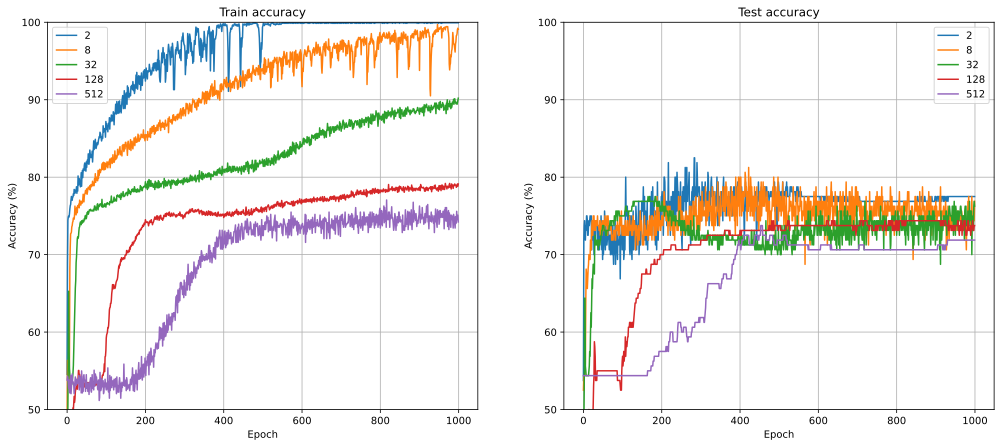

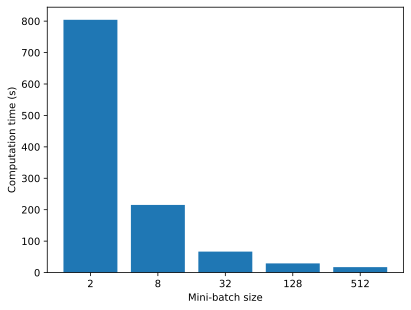

In [30]:
# Create a figure with 1 row and 2 columns of subplots, setting the figure size
fig, ax = plt.subplots(1, 2, figsize=(17, 7))

# Plot training accuracy for each batch size across epochs
ax[0].plot(accuracyResultsTrain)
ax[0].set_title('Train accuracy')  # Set the title for the first plot

# Plot testing accuracy for each batch size across epochs
ax[1].plot(accuracyResultsTest)
ax[1].set_title('Test accuracy')  # Set the title for the second plot

# Common settings for both plots (training and testing accuracy)
for i in range(2):
    ax[i].legend(batchsizes)  # Add a legend indicating the batch sizes
    ax[i].set_xlabel('Epoch')  # Label the x-axis as 'Epoch'
    ax[i].set_ylabel('Accuracy (%)')  # Label the y-axis as 'Accuracy (%)'
    ax[i].set_ylim([50, 100])  # Set the y-axis limits from 50% to 100% accuracy
    ax[i].grid()  # Add gridlines to the plots for better readability

# Display the accuracy plots
plt.show()

# Bar plot of computation time for each batch size
plt.bar(range(len(comptime)), comptime, tick_label=batchsizes)  # Create a bar plot with computation times
plt.xlabel('Mini-batch size')  # Label the x-axis as 'Mini-batch size'
plt.ylabel('Computation time (s)')  # Label the y-axis as 'Computation time (seconds)')
plt.show()  # Display the bar plot


### **Conclusion from Batch Size Experiment**

1. **Batch Size Impact on Training and Testing Accuracy**:
   - **Batch Size 2 (Blue Line)**:
     - Achieves the highest training accuracy, close to 100%, indicating the model fits the training data very well.
     - However, the test accuracy fluctuates between 70-80%, showing signs of overfitting. This means the model memorizes the training data but fails to generalize well to unseen data.

   - **Batch Size 128 (Red Line)**:
     - Exhibits a balanced performance with both training and test accuracies around 70%. The training accuracy does not reach 100%, which indicates the model is not overfitting.
     - The gap between training and test accuracies is minimal, suggesting that the model generalizes better compared to other batch sizes. Therefore, this batch size provides the best balance between model training and evaluation performance.

   - **Other Batch Sizes (8, 32, 512)**:
     - Show varying degrees of performance, with batch size 512 (purple line) being the slowest to learn, indicating difficulties in convergence, possibly due to large updates that affect the learning stability.
     - Smaller batch sizes like 8 (orange line) and 32 (green line) also demonstrate high training accuracies but larger discrepancies between train and test performances, indicating overfitting.

2. **Key Insight**:
   - A high training accuracy does not necessarily indicate a good model. The most important aspect is the gap between training and testing accuracies. A smaller gap reflects a better generalized model that does not just memorize the training data but performs consistently on unseen data.

3. **Real-World Relevance**:
   - The lower accuracy of around 70-80% for this wine quality prediction model reflects the inherent variability in human taste preferences. Ratings for the same wine can vary due to factors like mood, season, and context, making this a challenging prediction problem. This variability emphasizes that even the best-performing model might not achieve perfect accuracy due to the nature of subjective human evaluations.

### **Summary**:
- **Optimal Batch Size**: For this particular model and dataset, a batch size of 128 provides the best trade-off between training and testing performance, indicating a well-generalized model.
- **Model Evaluation**: It is crucial to consider both training and test accuracies and aim for a minimal gap between them to ensure the model is not overfitting.
